# Importing Required Libraries 

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading our dataset

In [2]:
df = pd.read_csv('insurance.csv')

Displaying First 5 rows

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploring our data set

In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Charges are in US dollar($)

As you can see we have categorical features:
* Sex
* Smoker
* Region

# Data Analysis

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


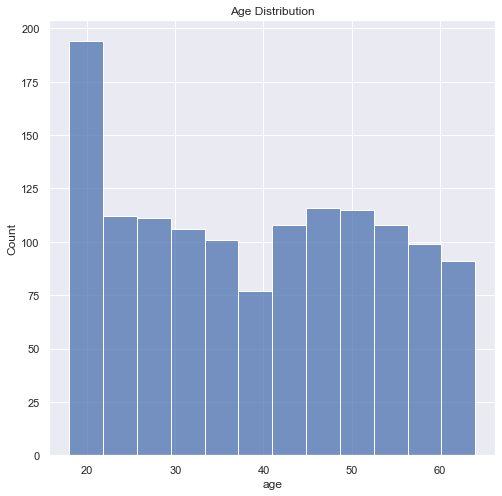

In [21]:
# distribution of age value

sns.set()
plt.figure(figsize=(8,8))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [18]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

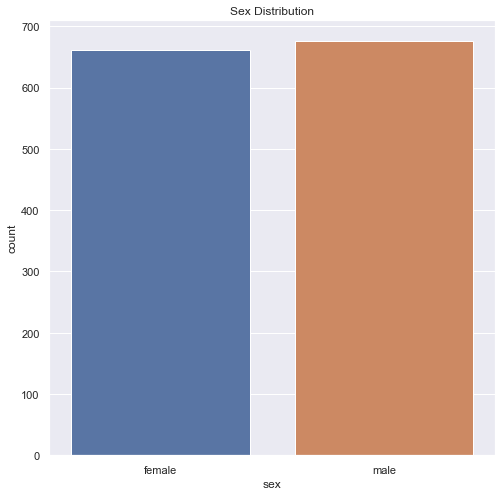

In [17]:
# distribution of gender column

plt.figure(figsize=(8,8))
sns.countplot(x='sex',data=df)
plt.title('Sex Distribution')
plt.show()

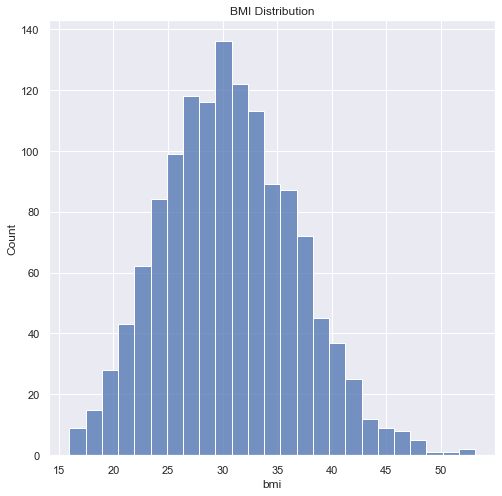

In [20]:
# bmi distribution
plt.figure(figsize=(8,8))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

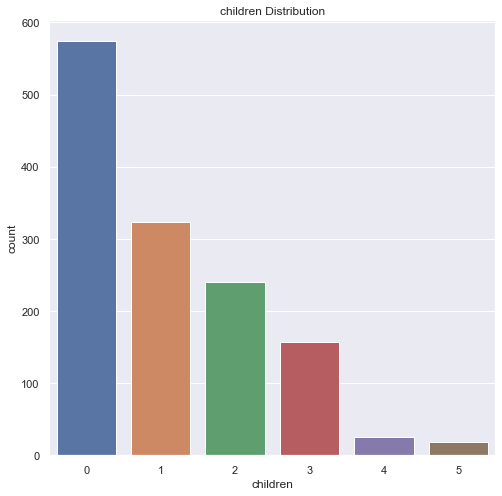

In [23]:
# Children distribution
plt.figure(figsize=(8,8))
sns.countplot(x='children',data=df)
plt.title('children Distribution')
plt.show()

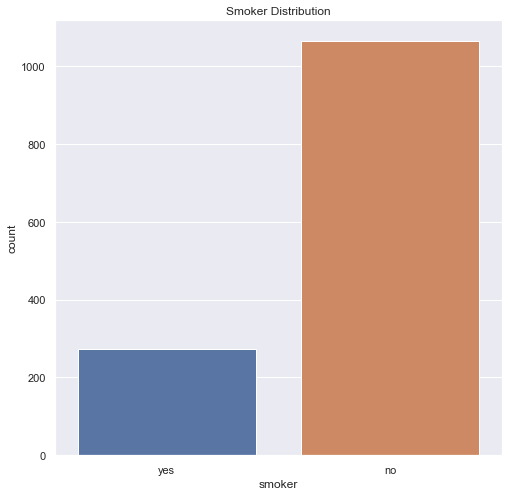

In [25]:
# smoker distribution

plt.figure(figsize=(8,8))
sns.countplot(x='smoker',data=df)
plt.title('Smoker Distribution')
plt.show()

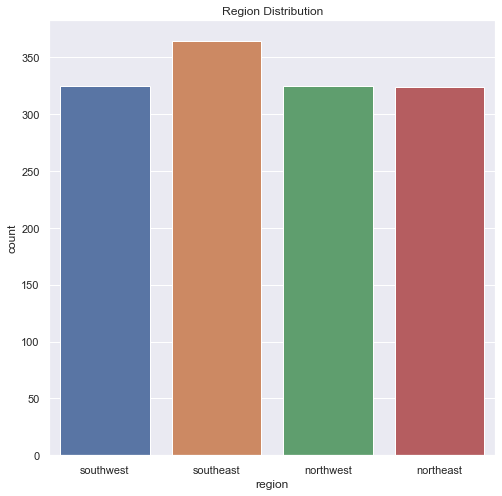

In [26]:
# Region distribution

plt.figure(figsize=(8,8))
sns.countplot(x='region',data=df)
plt.title('Region Distribution')
plt.show()

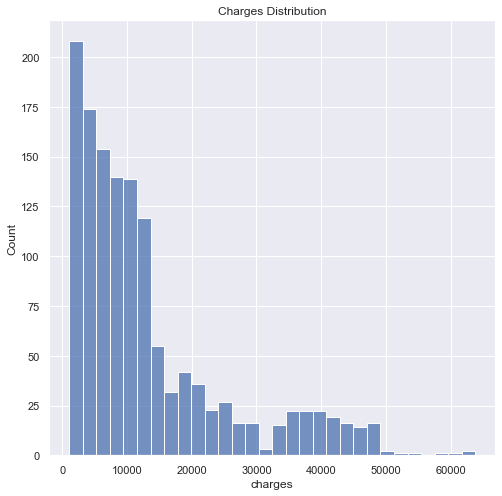

In [27]:
# charges distribution

plt.figure(figsize=(8,8))
sns.histplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

# Label Encoding
* **Since we have categorical features we have to convert them into number and fit into our model**
* **For Label encoding we can use LabelEncoder from sklearn**

In [28]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [30]:
df['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [32]:
# Apply LabelEncoding on sex column

df['sex'] = LE.fit_transform(df['sex'])
df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int64

**0 -> Female**
**1 -> Male**

In [33]:
df['sex'].unique()

array([0, 1], dtype=int64)

In [34]:
df['smoker']

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [35]:
df['smoker'] = LE.fit_transform(df['smoker'])
df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

**1 -> Yes**
**0 -> No**

In [38]:
df['region']

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [39]:
df['region'] = LE.fit_transform(df['region'])

In [40]:
df['region']

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

* **0 -> northeast**
* **1 -> northwest**
* **2 -> southeast**
* **3 -> southwest**

In [41]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


**As we can see all the categorical features have been transformed into numbers**

# Splitting the features and targets 

In [42]:
X = df.drop(columns='charges',axis=1)
y = df['charges']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=69,test_size=0.2)

In [46]:
X_train.shape,X_test.shape

((1070, 6), (268, 6))

# Model training 

In [47]:
Model = LinearRegression()

In [48]:
Model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation 

In [50]:
# prediction on training data
training_data_pred = Model.predict(X_train)

In [51]:
# R squared value
r_train = metrics.r2_score(y_train,training_data_pred)
print(f"R Squared value : {r_train}")

R Squared value : 0.7512896932167121


In [52]:
# prediction on test data
test_data_pred = Model.predict(X_test)

In [53]:
# R squared value
r_test = metrics.r2_score(y_test,test_data_pred)
print(f"R Squared value : {r_test}")

R Squared value : 0.7437936173365165


# Predicting System 

In [69]:
# 62,female,32.965,3,no,northwest
# converting the categorical features into numeric form
input_data = (62,0,32.965,3,0,1)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

In [70]:
Pred = Model.predict(input_data_reshaped)

In [71]:
Pred

array([16150.31675234])

In [78]:
print(f"The predicted insurance cost is: ${Pred[0]:.2f} ")

The predicted insurance cost is: $16150.32 


In [79]:
from sklearn.metrics import accuracy_score